In [1]:
%matplotlib inline
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

# Corona Indonesia

In [128]:
cases = pd.read_csv('cases.csv')
confirmed_acc = pd.read_csv('confirmed_acc.csv')
jabar = pd.read_csv('jabar.csv')
jakarta = pd.read_csv('jakarta.csv')
patient = pd.read_csv('patient.csv')
province_timeline = pd.read_csv('data/province_timeline.csv')
province = pd.read_csv('data/province.csv', encoding = "ISO-8859-1")

### Keterkaitan variabel

<p>data ivan</p>
- profil pasien (contoh: usia, gender)
- rate akumulasi (persentase positif, sembuh, mati)
- rank terjangkit internasional

indonesia
- kepadatan dan jumlah kasus // Fathu
- profil pasien (contoh: usia, gender) //Yulia
- pertambahan kasus (positif, dirawat, sembuh, mati -- waktu) // Hany
- rate akumulasi (persentase positif, sembuh, mati) //Rahma dan Dany
- jakarta odp pdp // reza


In [131]:
province.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


<Figure size 1152x576 with 0 Axes>

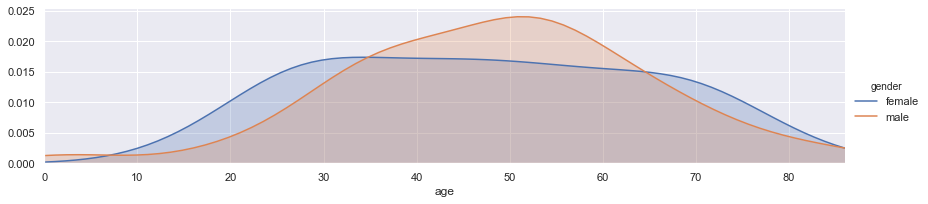

In [98]:
plt.figure(figsize=(16,8))
fig = sns.FacetGrid(patient,hue='gender', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = patient['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

In [112]:
province.drop(province[province["province_name"]=="Unknown"].index, inplace = True)

In [126]:
luas_provinsi = pd.read_csv("Data/Data luas wilayah indonesia.csv")
luas_provinsi.tail()

,Provinsi,Ibu Kota Provinsi,Luas,Persentase Terhadap Luas Indonesia,Jumlah Pulau 2,Unnamed: 5
30,Sulawesi Utara,Manado,13 851.64,0.72,668,NaN
31,Sumatera Barat,Padang,42 012.89,2.20,391,NaN
32,Sumatera Selatan,Palembang,91 592.43,4.79,53,NaN
33,Sumatera Utara,Medan,72 981.23,3.81,419,NaN
34,unknown,NaN,NaN,NaN,NaN,NaN


In [124]:
province["area"]=luas_provinsi["Luas"]

In [127]:
province["density"]=province["area"]/

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,rate_confirmed,area
29,30,Sulawesi Tenggara,Sulawesi,SG,Kendari,2448081,67,3,0,0,121.959.229,-3.697.078,0.000123,38 067.70
30,31,Sulawesi Utara,Sulawesi,SA,Manado,2386604,171,2,0,0,124.725.037,1.277.055,0.000084,13 851.64
31,32,Sumatra Barat,Sumatra,SB,Padang,5131900,121,5,0,0,100.118.408,-0.186767,0.000097,42 012.89
32,33,Sumatra Selatan,Sumatra,SS,Palembang,7941500,93,1,0,0,104.710.693,-3.107.606,0.000013,91 592.43
33,34,Sumatra Utara,Sumatra,SU,Medan,13766851,189,8,1,0,98.712.158,323.924,0.000058,72 981.23


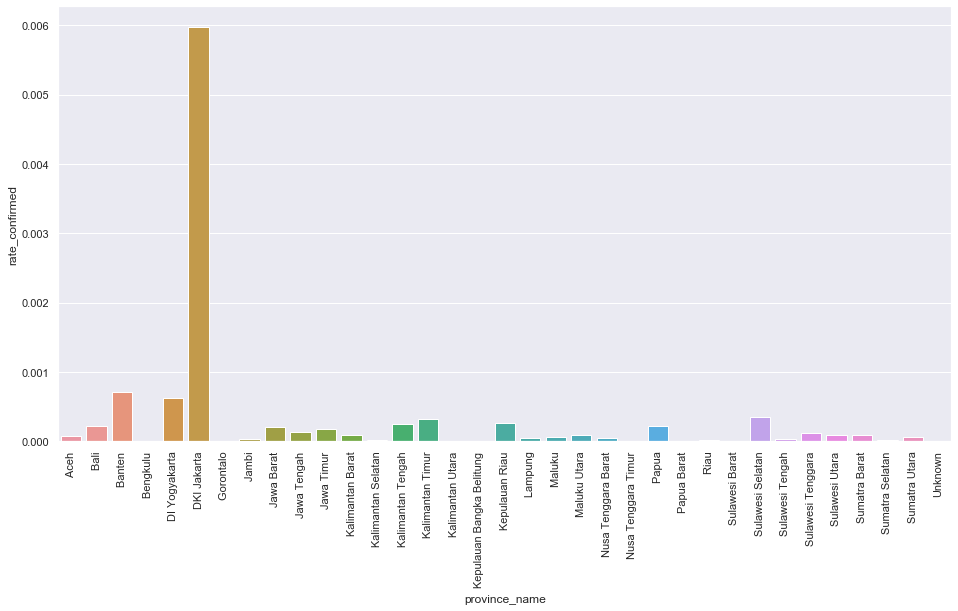

In [94]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="province_name", y="rate_confirmed", data=province)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print()

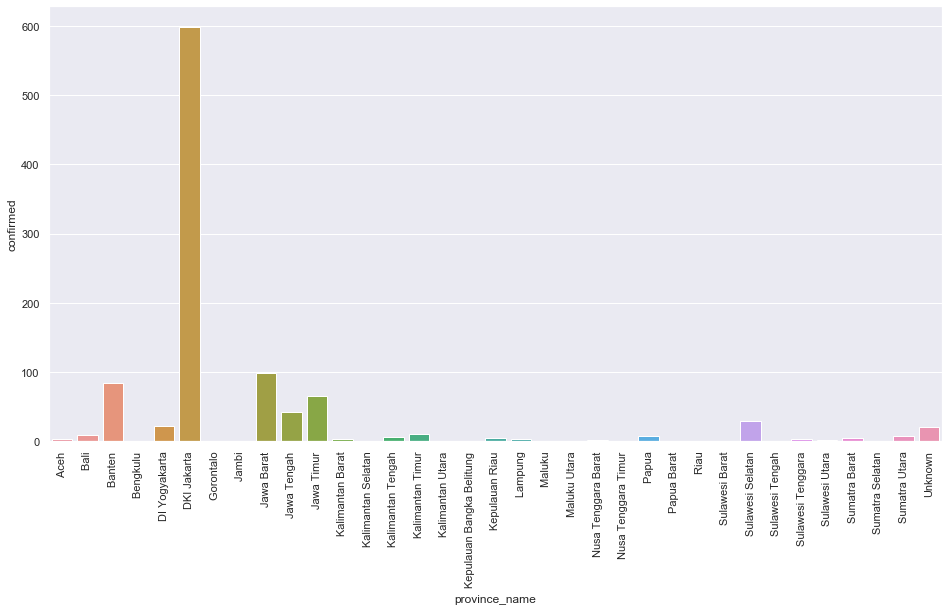

In [88]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="province_name", y="confirmed", data=province)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print()

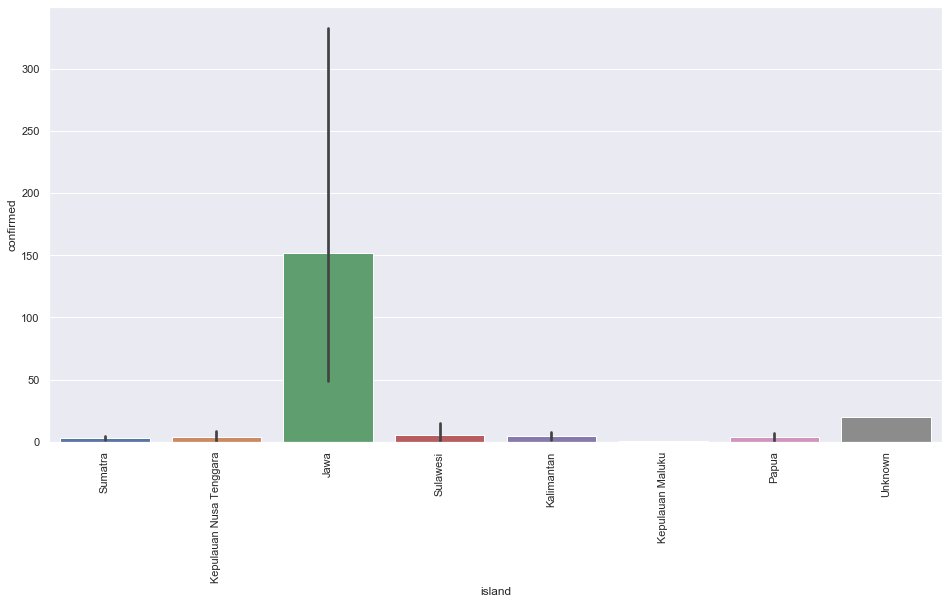

In [89]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="island", y="confirmed", data=province)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print()

## cases

In [24]:
cases.sample(5)

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
18,20-Mar-20,130.0,2028,60,369,1643,18,321,1,16,7,32,18.20%,81.02%,8.67%,4.34%,46.15%
15,17-Mar-20,142.0,1372,38,172,1278,22,156,1,9,2,7,12.54%,93.15%,4.07%,5.23%,26.76%
20,22-Mar-20,73.0,2438,64,514,1904,20,437,9,29,10,48,21.08%,78.10%,9.34%,5.64%,87.67%
4,6-Mar-20,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%
8,10-Mar-20,151.0,694,8,27,648,19,27,0,0,0,0,3.89%,93.37%,0.00%,0.00%,5.30%


In [20]:
cases.shape

(30, 17)

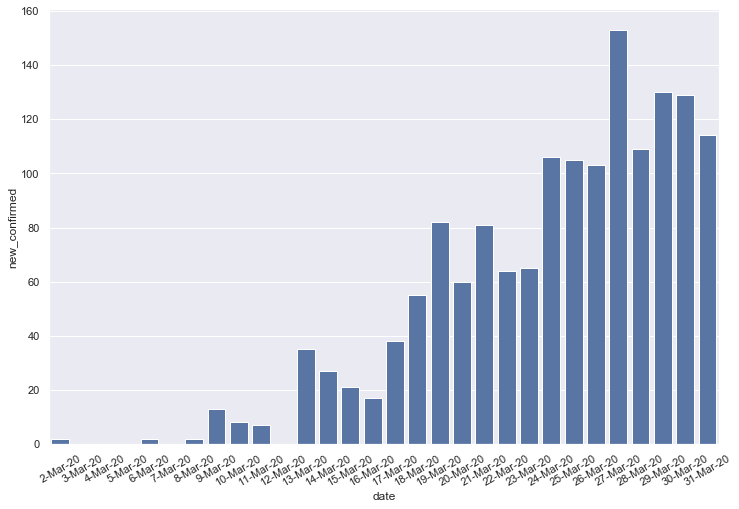

In [65]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="new_confirmed", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

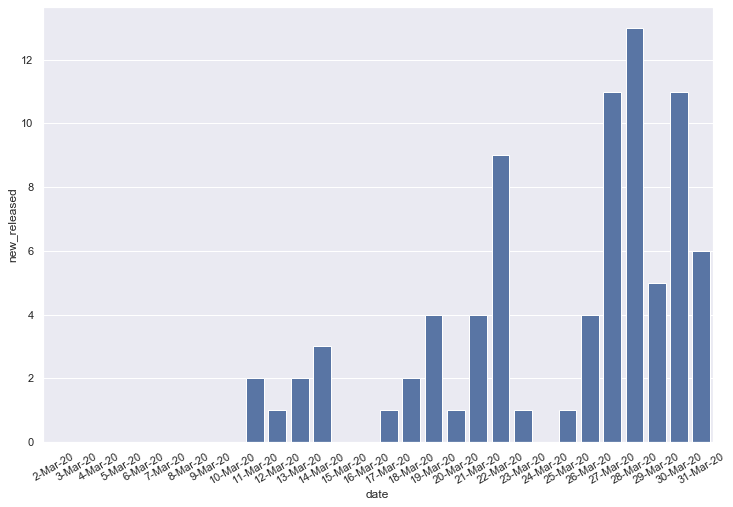

In [66]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="new_released", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

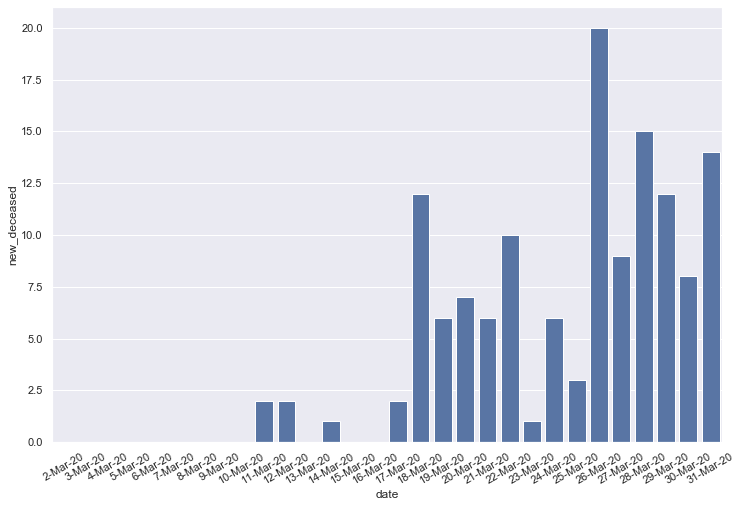

In [67]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="new_deceased", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

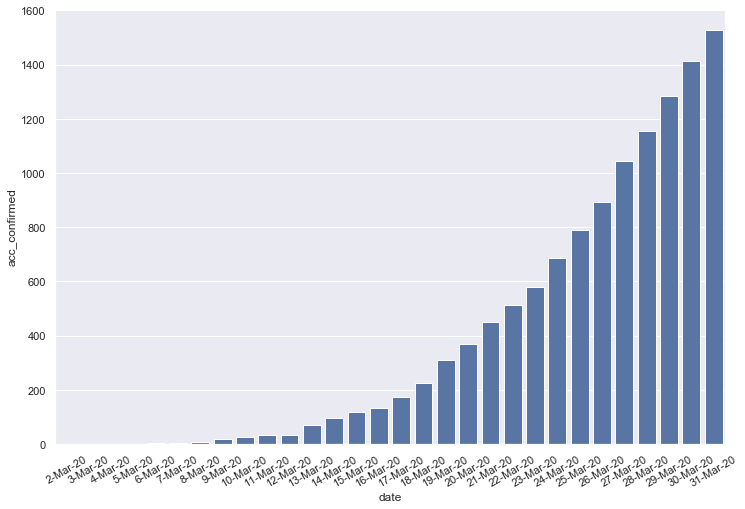

In [75]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="acc_confirmed", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

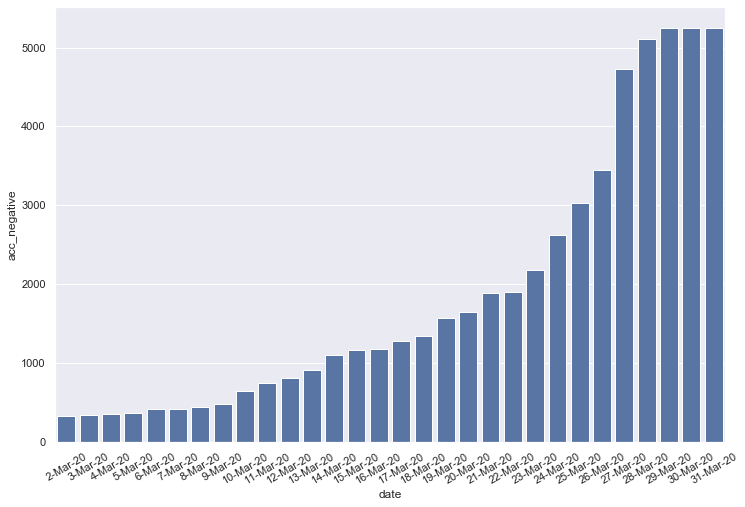

In [69]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="acc_negative", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

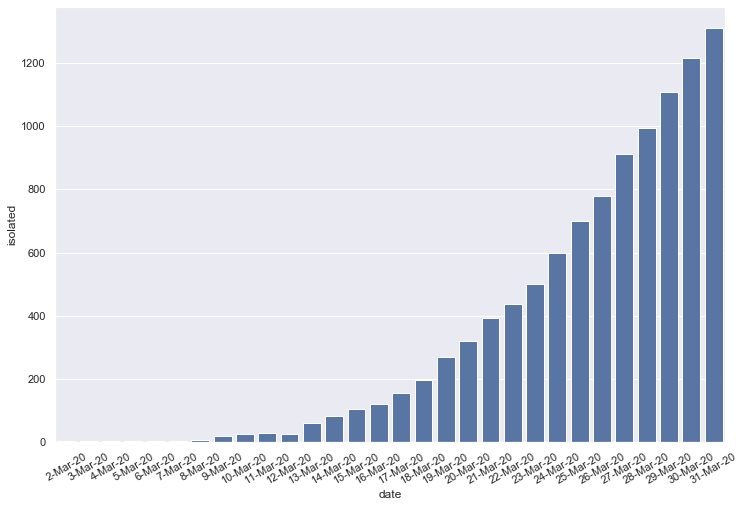

In [70]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="isolated", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

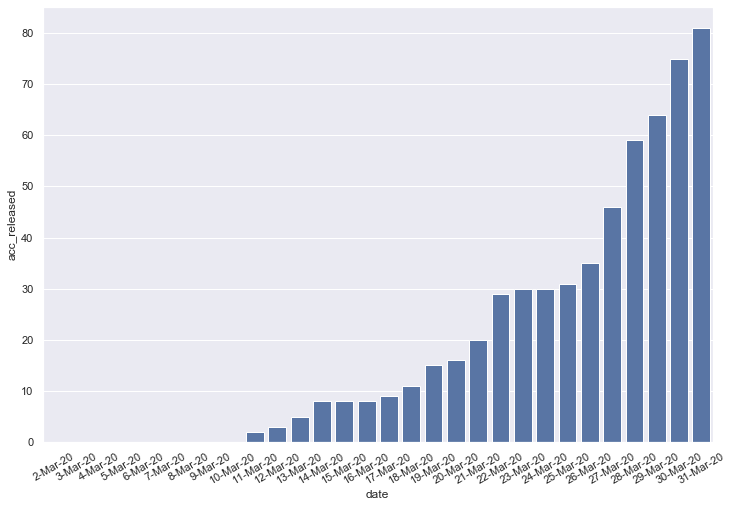

In [71]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="acc_released", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

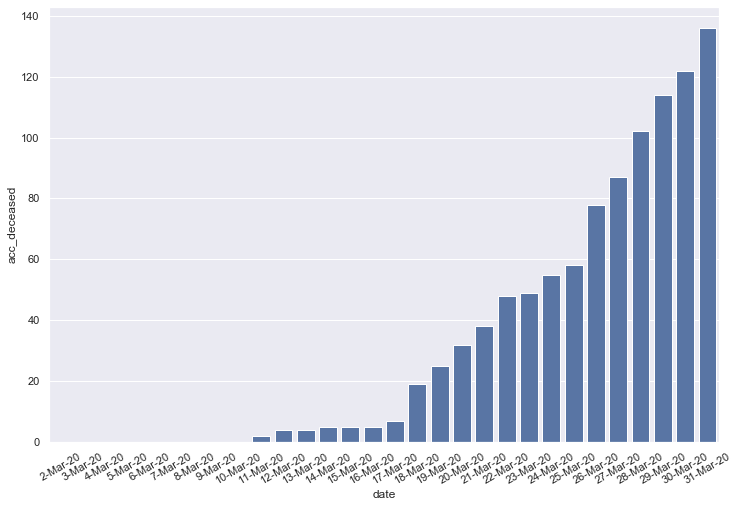

In [72]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="acc_deceased", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

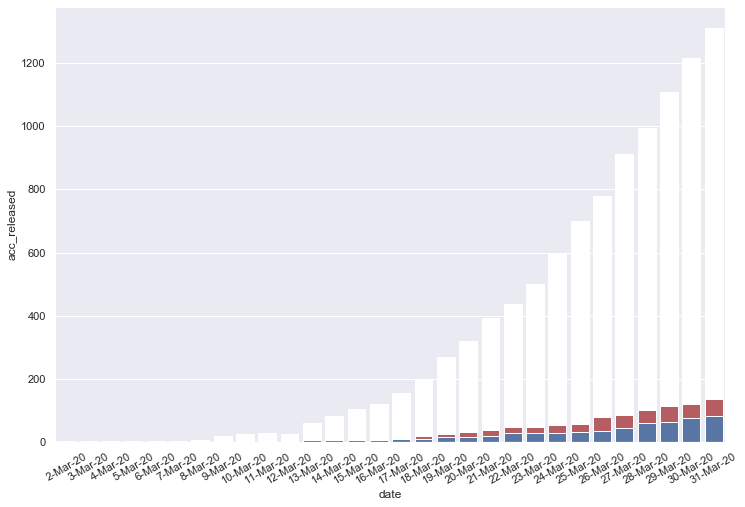

In [79]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date", y="isolated", data=cases, color="w")
ax = sns.barplot(x="date", y="acc_deceased", data=cases, color="r")
ax = sns.barplot(x="date", y="acc_released", data=cases, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

In [74]:
jakarta

,date,odp_process,odp_end,odp_total,pdp_process,pdp_end,pdp_total,jakbar,jakpus,jaksel,jaktim,jakut,outsidejakarta,unknown,confirmed,released,deceased,hospitalized,self_isolated
0,3/1/2020,14.0,115.0,129.0,9.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/2/2020,14.0,115.0,129.0,9.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/3/2020,94.0,121.0,215.0,24.0,30.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/4/2020,120.0,121.0,241.0,26.0,30.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/5/2020,127.0,140.0,267.0,49.0,34.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/6/2020,83.0,221.0,304.0,44.0,44.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3/7/2020,94.0,262.0,356.0,44.0,54.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3/8/2020,64.0,298.0,362.0,57.0,70.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3/9/2020,68.0,310.0,378.0,87.0,79.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3/10/2020,70.0,331.0,401.0,97.0,100.0,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
